<a href="https://colab.research.google.com/github/zackyalgiffari/Random-Walk-2D-Project/blob/main/Random_Walk_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalasi library celluloid untuk animasi plots
!pip install celluloid tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import module
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from matplotlib import animation, rc
from IPython.display import HTML
from numpy import random
from tabulate import tabulate as tbl

In [ ]:
# Inisialisasi
x, y = [], []             #posisi
status, sakit, recovery, hari = [], [], [], []
jumlah_sakit = 0
populasi = 200
probabilitas_jalan = 0.8  #80% dari 0-1
rasio_terinfeksi = 5      #5%  dari 1-100
waktu_pemulihan = 10

Hari yang dibutuhkan untuk imun semua : 84


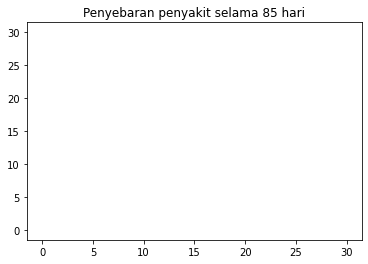

In [ ]:
# Memanggil fungsi untuk membuat animasi
fig = plt.figure()
camera = Camera(fig)

# Plotting titik dan status terinfeksi di awal
for i in range(populasi):
  x_sakit, y_sakit = [], []                      # Titik berwarna merah/ sakit
  x_sehat, y_sehat = [], []                      # Titik berwarna biru / sehat
  acakX = random.randint(30)
  x.append(acakX)
  acakY = random.randint(30)
  y.append(acakY)
  rasio = (random.randint(1,100))
  if rasio <= rasio_terinfeksi:
    status.append("sakit")
    x_sakit.append(acakX)
    y_sakit.append(acakY)
    jumlah_sakit += 1
    recovery.append(1)
  else:
    status.append("sehat")
    x_sehat.append(acakX)
    y_sehat.append(acakY)
    recovery.append(0)

hari_kee = 1
hari_ke = 0
hari.append(hari_kee)
sakit.append(jumlah_sakit)

plt.plot(x_sakit, y_sakit, 'ro')
plt.plot(x_sehat, y_sehat, 'bo')

# Hari terus berjalan sampai semua pulih/imun
while jumlah_sakit > 0:
  for i in range(populasi):
    x_sakit, y_sakit = [], []
    x_sehat, y_sehat = [], []

    # Plotting probabilitas bergerak 8 arah
    probabilitas = (random.uniform(0,1))
    if probabilitas >= probabilitas_jalan:
      arah = (random.uniform(0,1))
      if arah <= 0.125: x[i], y[i] = x[i-1] + 1, y[i-1]      # Bergerak ke kanan
      elif arah <= 0.25: x[i], y[i] = x[i-1] + 1, y[i-1] + 1 # Bergerak ke arah antara x dan y kanan atas
      elif arah <= 0.375: x[i], y[i] = x[i-1], y[i-1] + 1    # Bergerak ke arah atas
      elif arah <= 0.5:  x[i], y[i] = x[i-1] - 1, y[i-1] + 1 # Bergerak ke arah antara x dan y kiri atas
      elif arah <= 0.625: x[i], y[i] = x[i-1] - 1, y[i-1]    # Bergerak ke kiri
      elif arah <= 0.7 : x[i], y[i] = x[i-1] - 1, y[i-1] - 1 # Bergerak ke arah antara x dan y kiri bawah
      elif arah <= 0.825 : x[i], y[i] = x[i-1], y[i-1] - 1   # Bergerak ke arah bawah
      elif arah <= 1 : x[i], y[i] = x[i-1] + 1, y[i-1] - 1   # Bergerak ke arah antara x dan y kanan bawah

      # Ukuran ruang simulasi tidak melebihi 30x30
      if x[i] > 30: x[i] = x[i] - 1
      elif x[i] < 0: x[i] = x[i] + 1
      elif y[i] > 30:  y[i] = y[i] - 1
      elif y[i] < 0: y[i] = y[i] + 1

      # Pengecekan penyebaran virus
      for j in range(populasi):
        if j != i:
          if x[j] == x[i] and y[j] == y[i]:
            if status[j] != "sakit" and status[j] != "imun":
              if status[i] == "sakit":
                status[j] = "sakit"
                recovery[j] = 1
                jumlah_sakit += 1
            elif status[j] == "sakit":
              if status[i] == "sehat":
                status[i] = "sakit"
                recovery[i] = 1
                jumlah_sakit += 1

    # Pengecekan perubahan status sakit menjadi imun
    if status[i] == "sakit":
      if recovery[i] <= waktu_pemulihan:
        recovery[i] += 1
        x_sakit.append(x[i])
        y_sakit.append(y[i])
      else:
        status[i] = "imun"
        jumlah_sakit -= 1
        x_sehat.append(x[i])
        y_sehat.append(y[i])
    else:
      x_sehat.append(x[i])
      y_sehat.append(y[i])

    plt.plot(x_sakit, y_sakit, 'ro')
    plt.plot(x_sehat, y_sehat, 'bo')

  hari_kee += 1
  hari.append(hari_kee)
  sakit.append(jumlah_sakit)
  camera.snap()


plt.title(f"Penyebaran penyakit selama {hari_kee+1} hari")
print("Hari yang dibutuhkan untuk imun semua :", max(hari))

# Animasi plots
animation_plot = camera.animate()
animation_plot.save('plots.mp4')
rc('animation', html='jshtml')
animation_plot

In [ ]:
#animasi graph
fig, ax = plt.subplots()
plt.close()

#graph gambar
print("Hari yang dibutuhkan untuk imun semua : "+str(hari_ke))

ax.set_xlim((0, len(hari)+20))
ax.set_ylim((0, len(sakit)+20))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

arrX, arrY = [], []

def animate(i):
    if i < len(hari): xi, yi = hari[i], sakit[i]
    else: xi, yi = hari[len(hari)-1], sakit[len(hari)-1]
    arrX.append(xi)
    arrY.append(yi)
    line.set_data(arrX, arrY)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=100, blit=True)

rc('animation', html='jshtml')
anim

Hari yang dibutuhkan untuk imun semua : 0


In [ ]:
#Data yang terinfeksi setiap harinya
print("DATA INFEKSI")
table = []
for i in range(len(sakit)): table.append([hari[i], sakit[i]])
headers = ["Hari", "Terinfeksi"]
print(tbl(table, headers, tablefmt='grid'))

DATA INFEKSI
+--------+--------------+
|   Hari |   Terinfeksi |
+========+==============+
|      1 |           15 |
+--------+--------------+
|      2 |           15 |
+--------+--------------+
|      3 |           16 |
+--------+--------------+
|      4 |           18 |
+--------+--------------+
|      5 |           18 |
+--------+--------------+
|      6 |           18 |
+--------+--------------+
|      7 |           20 |
+--------+--------------+
|      8 |           23 |
+--------+--------------+
|      9 |           25 |
+--------+--------------+
|     10 |           27 |
+--------+--------------+
|     11 |           28 |
+--------+--------------+
|     12 |           15 |
+--------+--------------+
|     13 |           14 |
+--------+--------------+
|     14 |           13 |
+--------+--------------+
|     15 |           12 |
+--------+--------------+
|     16 |           12 |
+--------+--------------+
|     17 |           12 |
+--------+--------------+
|     18 |            9 |